In [1]:
import numpy as np
import pandas as pd
from tqdm.autonotebook import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Luc\AppData\Local\Temp\ipykernel_2992\3364245013.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
guest_list = pd.read_csv('guest_list_full.csv')
# guest_list.head()
guest_list = guest_list.rename(columns={'Adults': 'adults', 'Children': 'kids', 'Plus 1?': 'plus_ones',
                                        'Probability of adults coming': 'adult_prob',
                                        'Probability of children coming (if parents are coming)': 'kids_prob_given_adults'})
guest_list.head()

,Guest,K or L's side,Circle,adults,kids,plus_ones,Ceremony/Reception,adult_prob,kids_prob_given_adults,Location,Comments
0,"Rivers, Kelsey",K,Must invite no questions asked,1,0,0,Both,1.0,0.0,Local,NaN
1,"Rébillout, Luc",L,Must invite no questions asked,1,0,0,Both,1.0,0.0,Local,NaN
2,"Rébillout, Serge, Monique",L,Must invite no questions asked,2,0,0,Both,1.0,0.0,International,NaN
3,"Rébillout, Adrien",L,Must invite no questions asked,1,0,1,Both,0.9,0.0,International,I don't know if he will bring Frank
4,"Flake, Nathalie, Nate, Augustine, Evalyn",L,Must invite no questions asked,2,2,0,Both,1.0,1.0,Local,NaN


In [5]:
def monte_carlo_wedding_all_or_none(guest_list, num_simulations=10000):
    """
    Monte Carlo simulation where entire groups either attend or don't.
    """
    results = []
    for _ in tqdm(range(num_simulations)):
        total_adults_attending = 0
        total_kids_attending = 0

        for _, guest in guest_list.iterrows():
            num_adults = guest['adults'] + guest['plus_ones']
            adult_prob = guest['adult_prob']
            kids_prob = guest['kids_prob_given_adults']
            num_kids = guest['kids']

            # Determine if the entire group attends (all or none)
            group_attending = np.random.random() < adult_prob #If a random number between 0 and 1 is less than the probability, then it is considered the group is attending

            if group_attending:
                total_adults_attending += num_adults
                total_kids_attending += num_kids if kids_prob > 0 and np.random.random() < kids_prob else 0 # Kids also all or nothing given the adults are attending
                
        results.append({'total_adults_attending': total_adults_attending,
                        'total_kids_attending': total_kids_attending})

    return pd.DataFrame(results)

In [6]:
simulation_results = monte_carlo_wedding_all_or_none(guest_list, num_simulations=10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [7]:
simulation_results['total'] = simulation_results['total_adults_attending'] + simulation_results['total_kids_attending']

In [8]:
simulation_results.to_csv('wedding_monte_carlo_results_all_or_none.csv', index=False)

In [9]:
simulation_results = pd.read_csv('wedding_monte_carlo_results_all_or_none.csv')

In [11]:
# Analyze the results
print(simulation_results.describe())
print('Most common scenario:')
print(simulation_results.mode())


       total_adults_attending  total_kids_attending         total
count             10000.00000          10000.000000  10000.000000
mean                169.13280             61.648400    230.781200
std                   6.80416              6.799574     11.431631
min                 139.00000             39.000000    188.000000
25%                 165.00000             57.000000    223.000000
50%                 169.00000             62.000000    231.000000
75%                 174.00000             66.000000    239.000000
max                 193.00000             85.000000    270.000000
Most common scenario:
   total_adults_attending  total_kids_attending  total
0                     169                    61    230


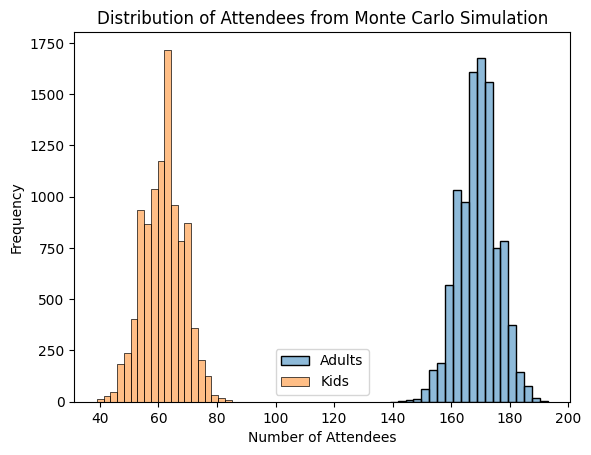

In [12]:
# Histogram using seaborn showing the portion of adults and kids contributing to the total sum

sns.histplot(data=simulation_results, x='total_adults_attending', bins=20, alpha=0.5, label='Adults')
sns.histplot(data=simulation_results, x='total_kids_attending', bins=20, alpha=0.5, label='Kids')
plt.xlabel("Number of Attendees")
plt.ylabel("Frequency")
plt.title("Distribution of Attendees from Monte Carlo Simulation")
plt.legend();

In [13]:
plt.close('all')
%matplotlib ipympl 

Text(0.5, 1.0, 'Distribution of Attendees from Monte Carlo Simulation')

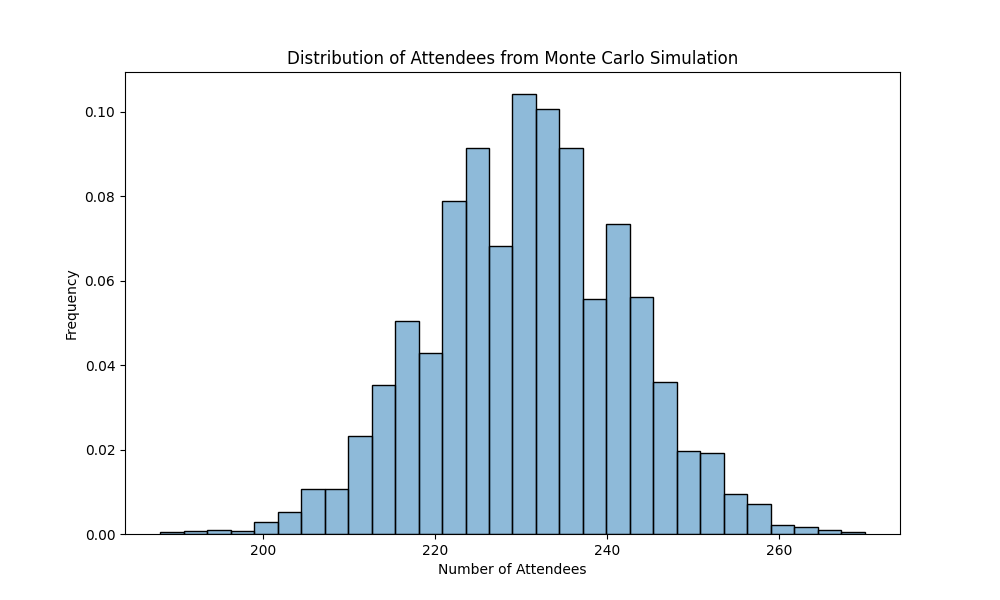

In [14]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.histplot(ax=ax, data=simulation_results, stat='probability', x='total', bins=30, alpha=0.5, label='Total')
ax.set_xlabel("Number of Attendees")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Attendees from Monte Carlo Simulation")
# ax.legend()
# f.show()

Text(0.5, 1.0, 'Distribution of Attendees from Monte Carlo Simulation')

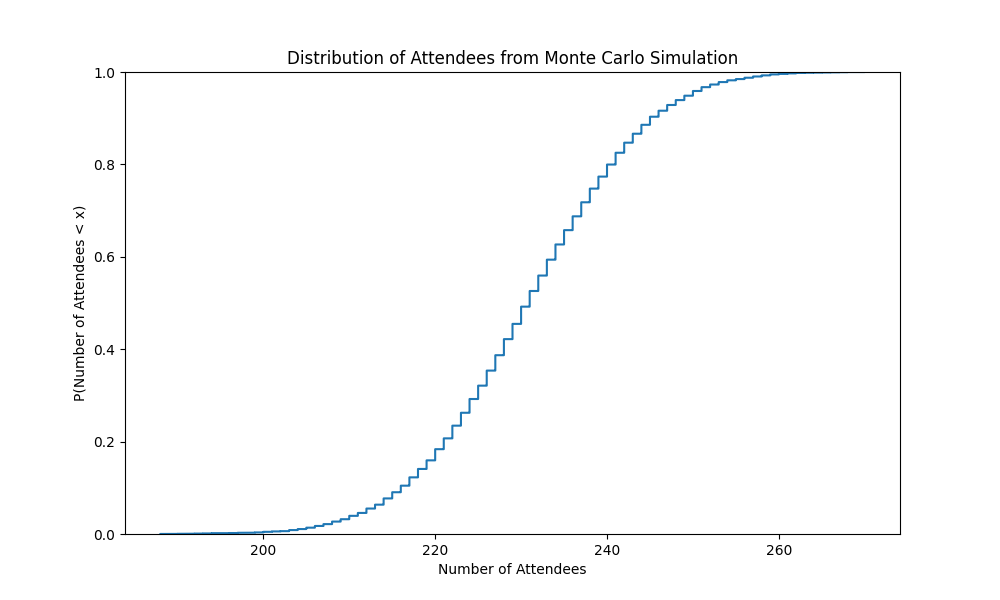

In [15]:
f1, ax1 = plt.subplots(1, 1, figsize=(10, 6))

# sns.histplot(ax=ax, data=simulation_results, stat='probability', x='total', bins=30, alpha=0.5, label='Total')
sns.ecdfplot(ax=ax1, data=simulation_results, x='total', label='Total')
ax1.set_xlabel("Number of Attendees")
ax1.set_ylabel("P(Number of Attendees < x)")
ax1.set_title("Distribution of Attendees from Monte Carlo Simulation")
# ax.legend()